# First Run following 4 Cells to install necessary repos. (Make sure that you have one image with some text on it, you will need to specify its path in 2nd cell)

In [1]:
!apt-get install git -y

# Install the missing "datasets" package required by IndicPhotoOCR
!pip install datasets

# Clone the IndicPhotoOCR repository and install its requirements
!git clone https://github.com/Bhashini-IITJ/IndicPhotoOCR.git
%cd IndicPhotoOCR
!pip install torch torchvision matplotlib opencv-python numpy
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install pytorch-lightning
!pip install lmdb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-c

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Model not found locally. Downloading textbpnpp from https://github.com/Bhashini-IITJ/SceneTextDetection/releases/download/TextBPN%2B%2B/TextBPN_resnet50_300.pth...


textbpnpp: 100%|██████████| 139M/139M [00:02<00:00, 49.1MB/s]


Downloaded model for textbpnpp.
Loading from IndicPhotoOCR/detection/textbpn/models/TextBPN_resnet50_300.pth
Image saved at: test.png


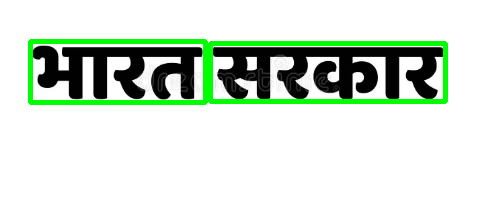

Identifying script for the cropped area...
Model not found locally. Downloading hindi from https://github.com/Bhashini-IITJ/ScriptIdentification/releases/download/Vit_Models/hindienglish.zip...


Device set to use cpu


Downloaded and extracted to IndicPhotoOCR/script_identification/vit/models/hindienglish
Recognizing text in detected area...
Model not found locally. Downloading hindi from https://github.com/anikde/STocr/releases/download/V2.0.0/hindi.ckpt...


hindi: 100%|██████████| 364M/364M [00:05<00:00, 70.5MB/s]


Downloaded model for hindi.


Device set to use cpu


Identifying script for the cropped area...
Recognizing text in detected area...
Extracted Text: [['भारत', 'सरकार']]


In [2]:
####################################
# 2. OCR: Extract Text from an Image
#####################################

import sys
sys.path.append("/content/IndicPhotoOCR")  # Adjust path if needed

from IndicPhotoOCR.ocr import OCR
from IPython.display import Image, display

# Create an OCR object (use device="cpu" if GPU is not available)
ocr_system = OCR(verbose=True,device = 'cpu')

# Specify the path to your image file (adjust as needed)
image_path = "/content/hindi1.png"

# Get detections and create a visualization image
detections = ocr_system.detect(image_path)
ocr_system.visualize_detection(image_path, detections)

# Display the detection result (saved as "test.png")
display(Image(filename="test.png"))

# Run the complete OCR pipeline to extract text.
extracted_text = ocr_system.ocr(image_path)
if extracted_text is None:
    # Fallback: if the complete pipeline doesn't return text, use recognise for Hindi text extraction
    extracted_text = ocr_system.recognise(image_path, "hindi")

print("Extracted Text:", extracted_text)


In [3]:

#####################################
# 3. SETUP: Install dependencies for Translation
#####################################

# Return to the base directory
%cd /content

# Clone the IndicTransToolkit repository and install it in editable mode
!git clone https://github.com/VarunGumma/IndicTransToolkit.git
%cd IndicTransToolkit
!pip install --editable ./


/content
Cloning into 'IndicTransToolkit'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 222 (delta 61), reused 97 (delta 47), pack-reused 95 (from 1)
Receiving objects: 100% (222/222), 4.38 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (89/89), done.
/content/IndicTransToolkit
Obtaining file:///content/IndicTransToolkit
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/VarunGumma/indic_nlp_library.git to /tmp/pip-install-4_jdydjd/indic-nlp-library-it2_f74090205a464fe9a39c272936463e2d
  Running command git clone --filter=blob:none --quiet https://github.com/VarunGumma/indic_nlp_library.git /tmp/pip-install-4_jdydjd/indic-nlp-library-it2_f74090205a464fe9a39c272936463e2d
  Resolved https://github.

In [4]:
####################################
# 4. Translation: Translate Extracted Text
#####################################

import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from IndicTransToolkit import IndicProcessor

# Define the translation model (ai4bharat/indictrans2-indic-en-1B)
model_name = "ai4bharat/indictrans2-indic-indic-1B"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, trust_remote_code=True)

# Set the device for running the model and move the model to that device
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE = 'cpu'
model = model.to(DEVICE)

# Initialize the processor for pre- and post-processing
ip = IndicProcessor(inference=True)

# Helper function to recursively flatten nested lists
def flatten_text(nested):
    if isinstance(nested, str):
        return [nested]
    elif isinstance(nested, list):
        flat_list = []
        for element in nested:
            flat_list.extend(flatten_text(element))
        return flat_list
    else:
        return [str(nested)]

# If extracted_text is not a simple string, flatten it
extracted_text = flatten_text(extracted_text)
# Join all parts into a single string
extracted_text = " ".join(extracted_text)

# Use the (string) extracted text as input.
input_sentences = [extracted_text]

# Define source and target languages:
# Here, source language is Hindi (Devanagari) and target is English (Latin)
src_lang, tgt_lang = "hin_Deva", "asm_Beng"

# Preprocess the input batch
batch = ip.preprocess_batch(input_sentences, src_lang=src_lang, tgt_lang=tgt_lang)

# Tokenize the input batch and move them to the chosen device
inputs = tokenizer(
    batch,
    truncation=True,
    padding="longest",
    return_tensors="pt",
    return_attention_mask=True
).to(DEVICE)

# Generate translation using the model (beam search)
with torch.no_grad():
    generated_tokens = model.generate(
        **inputs,
        use_cache=True,
        min_length=0,
        max_length=256,
        num_beams=5,
        num_return_sequences=1,
    )

# Decode the generated tokens into text
with tokenizer.as_target_tokenizer():
    generated_text = tokenizer.batch_decode(
        generated_tokens.detach().cpu().tolist(),
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True,
    )

# Postprocess the translations (e.g., handling any entity replacements)
translations = ip.postprocess_batch(generated_text, lang=tgt_lang)

# Print the original and translated text
for input_sentence, translation in zip(input_sentences, translations):
    print(f"\nSource [{src_lang}]: {input_sentence}")
    print(f"Translation [{tgt_lang}]: {translation}")

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

tokenization_indictrans.py:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-indic-indic-1B:
- tokenization_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


dict.SRC.json:   0%|          | 0.00/3.39M [00:00<?, ?B/s]

dict.TGT.json:   0%|          | 0.00/3.39M [00:00<?, ?B/s]

model.SRC:   0%|          | 0.00/3.26M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

configuration_indictrans.py:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-indic-indic-1B:
- configuration_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_indictrans.py:   0%|          | 0.00/79.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai4bharat/indictrans2-indic-indic-1B:
- modeling_indictrans.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]


Source [hin_Deva]: भारत सरकार
Translation [asm_Beng]: ভাৰত চৰকাৰ 


# Restart the session and then run following cells

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 940.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [2]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
added 22 packages in 5s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [3]:
%%writefile app.py
import streamlit as st
from PIL import Image
import os
import sys

# ------------------ Model Config Dictionary ------------------ #
model_config = {
    "Hindi to English": {
        "src_lang": "hin_Deva",
        "tgt_lang": "eng_Latn",
        "model": "ai4bharat/indictrans2-indic-en-1B"
    },
    "English to Hindi": {
        "src_lang": "eng_Latn",
        "tgt_lang": "hin_Deva",
        "model": "ai4bharat/indictrans2-indic-indic-1B"
    }
}

# ------------------ Dummy ML Models ------------------ #
def model_one(image_file,src_lang,tgt_lang,model_name):

    sys.path.append("/content/IndicPhotoOCR")  # Adjust path if needed
    original_dir = os.getcwd()
    os.chdir('IndicPhotoOCR')
    from IndicPhotoOCR.ocr import OCR
    from IPython.display import Image, display
    # Create an OCR object (use device="cpu" if GPU is not available)
    ocr_system = OCR(verbose=True,device = 'cpu')

    os.chdir(original_dir)
    # Specify the path to your image file (adjust as needed)
    image_path = image_file

    # Get detections and create a visualization image
    detections = ocr_system.detect(image_path)
    ocr_system.visualize_detection(image_path, detections)

    # Display the detection result (saved as "test.png")
    display(Image(filename="test.png"))

    # Run the complete OCR pipeline to extract text.
    extracted_text = ocr_system.ocr(image_path)
    if extracted_text is None:
        # Fallback: if the complete pipeline doesn't return text, use recognise for Hindi text extraction
        extracted_text = ocr_system.recognise(image_path, "hindi")
    os.chdir(original_dir)


    # //////////
    os.chdir('IndicTransToolkit')
    import torch
    from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
    from IndicTransToolkit import IndicProcessor

    # Define the translation model (ai4bharat/indictrans2-indic-en-1B)
    model_name = model_name
    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name, trust_remote_code=True)

    # Set the device for running the model and move the model to that device
    DEVICE = "cpu"
    model = model.to(DEVICE)

    # Initialize the processor for pre- and post-processing
    ip = IndicProcessor(inference=True)

    # Helper function to recursively flatten nested lists
    def flatten_text(nested):
        if isinstance(nested, str):
            return [nested]
        elif isinstance(nested, list):
            flat_list = []
            for element in nested:
                flat_list.extend(flatten_text(element))
            return flat_list
        else:
            return [str(nested)]

    # If extracted_text is not a simple string, flatten it
    extracted_text = flatten_text(extracted_text)
    # Join all parts into a single string
    extracted_text = " ".join(extracted_text)

    # Use the (string) extracted text as input.
    input_sentences = [extracted_text]

    # Define source and target languages:
    # Here, source language is Hindi (Devanagari) and target is English (Latin)
    # src_lang, tgt_lang = "hin_Deva", "asm_Beng"

    # Preprocess the input batch
    batch = ip.preprocess_batch(input_sentences, src_lang=src_lang, tgt_lang=tgt_lang)

    # Tokenize the input batch and move them to the chosen device
    inputs = tokenizer(
        batch,
        truncation=True,
        padding="longest",
        return_tensors="pt",
        return_attention_mask=True
    ).to(DEVICE)

    # Generate translation using the model (beam search)
    with torch.no_grad():
        generated_tokens = model.generate(
            **inputs,
            use_cache=True,
            min_length=0,
            max_length=256,
            num_beams=5,
            num_return_sequences=1,
        )

    # Decode the generated tokens into text
    with tokenizer.as_target_tokenizer():
        generated_text = tokenizer.batch_decode(
            generated_tokens.detach().cpu().tolist(),
            skip_special_tokens=True,
            clean_up_tokenization_spaces=True,
        )

    # Postprocess the translations (e.g., handling any entity replacements)
    translations = ip.postprocess_batch(generated_text, lang=tgt_lang)

    # Print the original and translated text
    i = []
    for input_sentence, translation in zip(input_sentences, translations):
        print(f"\nSource [{src_lang}]: {input_sentence}")
        print(f"Translation [{tgt_lang}]: {translation}")
        i = [src_lang, input_sentence,tgt_lang,translation]

    os.chdir(original_dir)
    return f"Extracted text from Input: {i[1]}", f"Translated Output: {i[3]}"

def model_two(image_file):
    return f"Model 2 Output: {image_file.name[:2]}"

# ------------------ Helper Functions ------------------ #
UPLOAD_FOLDER = "uploaded_images"
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)

def save_uploaded_file(uploaded_file):
    file_path = os.path.join(UPLOAD_FOLDER, uploaded_file.name)
    with open(file_path, "wb") as f:
        f.write(uploaded_file.getbuffer())
    return uploaded_file.name

def delete_uploaded_file(file_path):
    # file_path = os.path.join(UPLOAD_FOLDER, filename)
    if os.path.exists(file_path):
        os.remove(file_path)
        return True
    return False

# ------------------ Streamlit UI ------------------ #
st.set_page_config(page_title="Image Translation", layout="wide")

st.title("🖼 Image Translation Web App")
st.markdown("""
Welcome to the *Image Translation App*. Upload an image and choose a translation model from the list.
Then click on *Translate* to see the result.
""")

# Select model type
selected_option = st.selectbox(
    "Choose Translation Direction:",
    ["Hindi to English", "English to Hindi"]
)

# Initialize session state
if "uploader_key" not in st.session_state:
    st.session_state['uploader_key'] = 0
if "filename" not in st.session_state:
    st.session_state['filename'] = 0

# Upload image manually
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"], key = st.session_state["uploader_key"])

if uploaded_file is not None:
    print(uploaded_file.name, "11")
    filename = save_uploaded_file(uploaded_file)
    st.session_state["uploader_key"]+=1
    st.session_state['filename'] = filename
    st.rerun()

# Display uploaded image and buttons
if st.session_state['filename']!=0:
    filename = st.session_state['filename']
    print(filename)
    image_path = os.path.join(UPLOAD_FOLDER, filename)
    if os.path.exists(image_path):
        col1, col2 = st.columns(2)
        with col1:
            st.image(image_path, caption="Uploaded Image", use_container_width=True)
            if st.button("🗑 Delete Image"):
                deleted = delete_uploaded_file(image_path)
                filename = None
                # st.session_state["uploader_key"] = 0
                st.session_state['filename'] = 0
                st.rerun()

        with col2:
            if st.button("Translate"):
                print("inside tra")
                config = model_config[selected_option]

                # Decide model based on selected option
                r1,r2 = model_one(
                        image_file = image_path,
                        src_lang=config["src_lang"],
                        tgt_lang=config["tgt_lang"],
                        model_name=config["model"]
                    )

                st.subheader("Translated Output")
                print("succ")
                st.success(r1)
                st.success(r2)


Writing app.py


**Run the following cell and Copy the output**

In [7]:
!wget -q -O - ipv4.icanhazip.com

34.138.77.93


In [8]:
!streamlit run app.py &>/content/logs.txt &

**Open the URL given in the output of the following cell and paste the previous code/password there**

In [9]:
!npx localtunnel --port 8501

⠙your url is: https://slick-tigers-beg.loca.lt
^C


**To stop running you can use ctrl+c or Pause/stop button**